In [1]:
# DATASET_PATH = 'data_set/mini_speech_commands'

# data_dir = pathlib.Path(DATASET_PATH)
# if not data_dir.exists():
#     tf.keras.utils.get_file(
#           'mini_speech_commands.zip',
#       origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
#       extract=True,
#       cache_dir='.', cache_subdir='data')

In [2]:
import pandas as pd
import numpy as np

import os
from os import listdir
from os.path import isfile, join
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import tensorflow_io as tfio

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

from sklearn.model_selection import train_test_split


import random
import librosa
import soundfile as sf
from IPython.display import Audio

# from helper import _plot_signal_and_augmented_signal

import librosa.display
import matplotlib.pyplot as plt

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
DATASET_PATH = 'result_data\\'

In [4]:
# преобразование стерео в моно
# from pydub import AudioSegment
# sound = AudioSegment.from_wav(DATASET_PATH + 'kilina_1.wav')
# sound = sound.set_channels(1)
# sound.export(DATASET_PATH + 'kilina_1.wav', format="wav")

# read data

In [5]:
df = pd.read_pickle('df_res.pkl')

In [6]:
df.nunique()

name         72131
text            43
path             7
text_norm       40
dtype: int64

In [7]:
# df_ind_k = df.index[df['text'] == 'килина']
# df_ind_k
# df = df.drop(index = df_ind_k)

In [8]:
df.sample(10)

,name,text,path,text_norm
51,3905a1ca-8dae-47b9-8e40-0a503a420844,привет,result_data\1\,привет
1102,c33f46315c39de2f668e11a11bf4bb4b,выключить,result_data\2\,выключить
1314,f5fca719be2217521cbb3efdb03a22a7,детский,result_data\2\,детский
514,39b8dccebec821e272ed9f97ab0af019,выключить,result_data\2\,выключить
1252,e560359df8bc57fd07a1e8592bbfa1d3,выключить,result_data\2\,выключить
430,22e1875b7dfec67d36cdcaca6c37f9ab,выключить,result_data\2\,выключить
780,775c05a825c506715facc75bb3ca289e,выключить,result_data\2\,выключить
765,7459eccf0a03bfb55f04ed823d8faf40,выключить,result_data\2\,выключить
987,a87d514c3e7abc0a8360fb08a96d6f92,выключить,result_data\2\,выключить
1166,d1fd1082c6b792e0ad4d33e17baf94f5,выключить,result_data\2\,выключить


In [8]:
df['full_path'] = [i + j for i, j in list(zip(df['path'], df['name']))]

In [9]:
df['full_path_wav'] = [i + '.wav' for i in df['full_path']]

In [10]:
df['full_path_wav'] = [i.replace(' ', '') for i in df['full_path_wav']]

In [11]:
df['full_path'][0]

'result_data\\1\\00263e5e-6685-4ad6-9b44-c91af6bd73dd'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72131 entries, 0 to 72130
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           72131 non-null  object
 1   text           72131 non-null  object
 2   path           72131 non-null  object
 3   text_norm      72131 non-null  object
 4   full_path      72131 non-null  object
 5   full_path_wav  72131 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [14]:
df.sample(10)

,name,text,path,text_norm,full_path,full_path_wav
506,3790be88d1602088737a1f722d817811,выключить,result_data\2\,выключить,result_data\2\3790be88d1602088737a1f722d817811,result_data\2\3790be88d1602088737a1f722d817811...
442,25c6ff8ae5bdbfa138fd5a1586f7ac50,выключить,result_data\2\,выключить,result_data\2\25c6ff8ae5bdbfa138fd5a1586f7ac50,result_data\2\25c6ff8ae5bdbfa138fd5a1586f7ac50...
314,0839b16470da049b56fce3c94fd03b12,выключить,result_data\2\,выключить,result_data\2\0839b16470da049b56fce3c94fd03b12,result_data\2\0839b16470da049b56fce3c94fd03b12...
931,9ca526ccfdec000ef3343831f3f15b4a,выключить,result_data\2\,выключить,result_data\2\9ca526ccfdec000ef3343831f3f15b4a,result_data\2\9ca526ccfdec000ef3343831f3f15b4a...
646,58ba01075b9e8bc6d239d75175529d71,выключить,result_data\2\,выключить,result_data\2\58ba01075b9e8bc6d239d75175529d71,result_data\2\58ba01075b9e8bc6d239d75175529d71...
282,kilina_7,килина,result_data\1\,килина,result_data\1\kilina_7,result_data\1\kilina_7.wav
414,1ee52a2495ffa5dc90dde00b3b78d389,выключить,result_data\2\,выключить,result_data\2\1ee52a2495ffa5dc90dde00b3b78d389,result_data\2\1ee52a2495ffa5dc90dde00b3b78d389...
1173,d2eceeedf1aca1bc95c9ee719bbae004,выключить,result_data\2\,выключить,result_data\2\d2eceeedf1aca1bc95c9ee719bbae004,result_data\2\d2eceeedf1aca1bc95c9ee719bbae004...
834,859cfa16164f62310f6e525197316700,выключить,result_data\2\,выключить,result_data\2\859cfa16164f62310f6e525197316700,result_data\2\859cfa16164f62310f6e525197316700...
437,25101d1317f230f9d9a26e2714dffde5,выключить,result_data\2\,выключить,result_data\2\25101d1317f230f9d9a26e2714dffde5,result_data\2\25101d1317f230f9d9a26e2714dffde5...


In [13]:
count = 0
for i in df.iterrows():
    full_path = i[1][-1]
    full_path = fr"{full_path}"
    check = os.path.exists(full_path)
    if check == False:
        count += 1
print(count)
    

0


In [14]:
dict_ = {}
for i in df['text_norm']:
    if i in dict_:
        dict_[i] += 1
    else:
        dict_[i] = 1
dict_

{'привет': 10658,
 'семьдесят шесть': 422,
 'один': 8651,
 'сорок один': 422,
 'два': 6752,
 'сорок два': 211,
 'ноль': 2321,
 'одиннадцать': 422,
 'сто сорок два': 422,
 'восемьдесят': 422,
 'четыре': 1899,
 'двести семьдесят один': 422,
 'тридцать два': 211,
 'три': 2110,
 'сорок шесть': 211,
 'сто тридцать восемь': 211,
 'тридцать девять': 211,
 'двести двадцать': 211,
 'сто тридцать девять': 211,
 'точка': 422,
 'тридцать': 422,
 'тридцать шесть': 211,
 'пять': 844,
 'сто десять': 211,
 'тридцать один': 211,
 'девятнадцать': 422,
 'пока': 422,
 'двадцать': 422,
 'сто тридцать один': 211,
 'килина': 3376,
 'выключить': 11433,
 'детский': 10583,
 'кухня': 2954,
 'пятнадцать': 422,
 'семь': 633,
 'включить': 1477,
 'семнадцать': 211,
 'тринадцать': 422,
 'шесть': 211,
 'девять': 211}

In [15]:
# Выравниваю датасет, чтоб было равное кол-во токенов
max_count = 423
for i, j in dict_.items():
    l = []
    count = 0
    if j >= max_count:
        for row in df.iterrows():
            name_norm = row[1][3]
            if name_norm == i:
                l.append(row[0])
        print(len(l), i)
        for ind in l:
            if count <  max_count:
                count += 1
            else:
                df = df.drop(index=ind)
df.info()

10658 привет
8651 один
6752 два
2321 ноль
1899 четыре
2110 три
844 пять
3376 килина
11433 выключить
10583 детский
2954 кухня
633 семь
1477 включить
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13939 entries, 0 to 70150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           13939 non-null  object
 1   text           13939 non-null  object
 2   path           13939 non-null  object
 3   text_norm      13939 non-null  object
 4   full_path      13939 non-null  object
 5   full_path_wav  13939 non-null  object
dtypes: object(6)
memory usage: 762.3+ KB


In [16]:
# Увеличиваю датасет путем размножения токенов
for i,j in dict_.items():
    if j < max_count:
        res_num = max_count//j + 1
        is_hol = df['text_norm'] == i
        df_try = df[is_hol]
        df = df.append([df_try]*res_num,ignore_index=True)
# df = df.append(df['text_norm'] == [df_try] *5,ignore_index=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33773 entries, 0 to 33772
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           33773 non-null  object
 1   text           33773 non-null  object
 2   path           33773 non-null  object
 3   text_norm      33773 non-null  object
 4   full_path      33773 non-null  object
 5   full_path_wav  33773 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [18]:
commands = [i for i in df['text_norm']]
commands = np.sort(np.array(list(set(commands))))
commands

array(['включить', 'восемьдесят', 'выключить', 'два', 'двадцать',
       'двести двадцать', 'двести семьдесят один', 'девятнадцать',
       'девять', 'детский', 'килина', 'кухня', 'ноль', 'один',
       'одиннадцать', 'пока', 'привет', 'пятнадцать', 'пять',
       'семнадцать', 'семь', 'семьдесят шесть', 'сорок два', 'сорок один',
       'сорок шесть', 'сто десять', 'сто сорок два',
       'сто тридцать восемь', 'сто тридцать девять', 'сто тридцать один',
       'точка', 'три', 'тридцать', 'тридцать два', 'тридцать девять',
       'тридцать один', 'тридцать шесть', 'тринадцать', 'четыре', 'шесть'],
      dtype='<U21')

# Augmentation

In [25]:

def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    fig, ax = plt.subplots(nrows=2)
    librosa.display.waveplot(signal, sr=sr, ax=ax[0])
    ax[0].set(title="Original signal")
    librosa.display.waveplot(augmented_signal, sr=sr, ax=ax[1])
    ax[1].set(title="Augmented signal")
    plt.show()

In [26]:
# ф-я добавления шума
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

# ф-я изменения длины звуковой дорожки
def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)

# изменение тона
def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

# Отдаленость голоса
def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

# переворачивание сигнала
def invert_polarity(signal):
    return signal * -1

In [27]:
file = r'result_data\kilina_9.wav'
os.path.exists(file)

True

In [28]:
%%time
# шум
file = r'result_data\kilina_9.wav'
signal, sr = librosa.load(file)
augmented_signal = add_white_noise(signal, 0.5)
sf.write(r"result_data\augmented_audio.wav", augmented_signal, sr)


Wall time: 890 ms


In [29]:
%%time
# длина
file = r'result_data\kilina_9.wav'
signal, sr = librosa.load(file)
augmented_signal = time_stretch(signal, 0.5)
sf.write(r"result_data\augmented_audio.wav", augmented_signal, sr)


Wall time: 117 ms


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.5 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()


In [30]:
%%time
# тон
file = r'result_data\kilina_9.wav'
signal, sr = librosa.load(file)
augmented_signal = pitch_scale(signal,sr, 0.0)
sf.write(r"result_data\augmented_audio.wav", augmented_signal, sr)


Wall time: 215 ms


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error


In [31]:

%%time
# отдаленность

signal, sr = librosa.load(file)
augmented_signal = random_gain(signal, 0.2, 0.24)
sf.write(r"result_data\augmented_audio.wav", augmented_signal, sr)


Wall time: 42 ms


In [32]:

%%time
# переворачивание

signal, sr = librosa.load(file)
augmented_signal = invert_polarity(signal)
sf.write(r"result_data\augmented_audio.wav", augmented_signal, sr)

Wall time: 45 ms


In [33]:
df.sample()

,name,text,path,text_norm,full_path,full_path_wav
424,4a2114874f5721664ed80f2505464649,один,result_data\2\,один,result_data\2\4a2114874f5721664ed80f2505464649,result_data\2\4a2114874f5721664ed80f2505464649...


In [35]:
%%time

path_noise = "result_data\\noise\\"
path_length = "result_data\\length\\"
path_tone = "result_data\\tone\\"
path_remoteness = "result_data\\remoteness\\"
path_invert = "result_data\\invert\\"
for file in df.iterrows():
#     print(file[1])
    audio_file = file[1][5]
    name = file[1][0]
    path = file[1][2]
    text = file[1][3]
    # audio file to vektor
    signal, sr = librosa.load(audio_file)
    values = [i/100 for i in range(1, 50, 1)]
#     values = [1]
    values_tone = [i/100 for i in range(-50, 60)]
#     values_tone = [2]
    # шум
    
    for noise in values:
        augmented_signal = add_white_noise(signal, noise)
        if os.path.isdir(path_noise) == False:
            os.mkdir(path_noise)
        path_name_noise = f"{path_noise}{name}_noise_{str(noise)}"
        sf.write(f"{path_name_noise}.wav", augmented_signal, sr)
        with open(f"{path_name_noise}.txt", "w") as file:
            file.write(f"{text}")
    # длина
    for length in values:
        augmented_signal = time_stretch(signal, length)
        if os.path.isdir(path_length) == False:
            os.mkdir(path_length)
        path_name_length = f"{path_length}{name}_length_{str(length)}"
        
        sf.write(f"{path_name_length}.wav", augmented_signal, sr)
        with open(f"{path_name_length}.txt", "w") as file:
            file.write(f"{text}")
    # тон
    for tone in values_tone:
        augmented_signal = pitch_scale(signal,sr, tone)
        if os.path.isdir(path_tone) == False:
            os.mkdir(path_tone)
        path_name_tone = f"{path_tone}{name}_tone_{str(tone)}"
        sf.write(f"{path_name_tone}.wav", augmented_signal, sr)
        with open(f"{path_name_tone}.txt", "w") as file:
            file.write(f"{text}")
    # отдаленность
    augmented_signal = random_gain(signal)
    if os.path.isdir(path_remoteness) == False:
        os.mkdir(path_remoteness)
    path_name_remoteness = f"{path_remoteness}{name}_remoteness"
    sf.write(f"{path_name_remoteness}.wav", augmented_signal, sr)
    with open(f"{path_name_remoteness}.txt", "w") as file:
            file.write(f"{text}")
    # перевернуть спектрограмму
    augmented_signal = invert_polarity(signal)
    if os.path.isdir(path_invert) == False:
        os.mkdir(path_invert)
    path_name_invert = f"{path_invert}{name}_invert"
    sf.write(f"{path_name_invert}.wav", augmented_signal, sr)
    with open(f"{path_name_invert}.txt", "w") as file:
            file.write(f"{text}")

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.01 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.02 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.03 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.04 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveS

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.37 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.38 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.39 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass rate=0.4 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveSh

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=-0.24 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=-0.23 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=-0.22 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=-0.21 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=-0.2 as keyword args. From version 0.10 passing 

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.17 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.18 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.19 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.21 as keyword args. From version 0.10 passing these

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.57 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.58 as keyword args. From version 0.10 passing these as positional arguments will result in an error
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Pass sr=22050, n_steps=0.59 as keyword args. From version 0.10 passing these as positional arguments will result in an error


KeyboardInterrupt: 

# Train

## В обучение подаются сигналы одноканальной размерности(моно)

In [21]:
df.head(1)

,name,text,path,text_norm,full_path,full_path_wav
0,00263e5e-6685-4ad6-9b44-c91af6bd73dd,привет,result_data\1\,привет,result_data\1\00263e5e-6685-4ad6-9b44-c91af6bd...,result_data\1\00263e5e-6685-4ad6-9b44-c91af6bd...


In [20]:
def num_text(text):
    d = list(commands).index(text)
#     print(d, text)
    return d

In [21]:
df['text_num'] = df['text_norm'].apply(lambda x: num_text(x))

In [22]:
df.sample(10)

,name,text,path,text_norm,full_path,full_path_wav,text_num
24652,9b372938-d9e3-4147-bbb0-f5b2a2868cc8_tone_0.12,тридцать,result_data\tone\,тридцать,result_data\tone\9b372938-d9e3-4147-bbb0-f5b2a...,result_data\tone\9b372938-d9e3-4147-bbb0-f5b2a...,32
5183,9b09917f-7854-4a0a-a481-b8cc2fc0b9e7_length_0.48,точка,result_data\length\,точка,result_data\length\9b09917f-7854-4a0a-a481-b8c...,result_data\length\9b09917f-7854-4a0a-a481-b8c...,30
18283,3e6b4784-6147-4fce-a977-b8eb21396fbb_tone_-0.24,восемьдесят,result_data\tone\,восемьдесят,result_data\tone\3e6b4784-6147-4fce-a977-b8eb2...,result_data\tone\3e6b4784-6147-4fce-a977-b8eb2...,1
26701,b442edc8-f0f1-47c7-8136-8786cd230668_tone_-0.02,тридцать один,result_data\tone\,тридцать один,result_data\tone\b442edc8-f0f1-47c7-8136-8786c...,result_data\tone\b442edc8-f0f1-47c7-8136-8786c...,35
25467,9cba5849-3480-4943-9161-f52f6ca5b36a_tone_-0.34,тридцать шесть,result_data\tone\,тридцать шесть,result_data\tone\9cba5849-3480-4943-9161-f52f6...,result_data\tone\9cba5849-3480-4943-9161-f52f6...,36
18855,8365915e-e0e7-4c50-b88b-3bff0874ce4d_length_0.11,двести семьдесят один,result_data\length\,двести семьдесят один,result_data\length\8365915e-e0e7-4c50-b88b-3bf...,result_data\length\8365915e-e0e7-4c50-b88b-3bf...,6
27762,c7dc8761-da53-4d91-a8d9-f6ccc649ffcb_tone_-0.08,девятнадцать,result_data\tone\,девятнадцать,result_data\tone\c7dc8761-da53-4d91-a8d9-f6ccc...,result_data\tone\c7dc8761-da53-4d91-a8d9-f6ccc...,7
8354,9941039f785debd331e298dda122af80_noise_0.31,пятнадцать,result_data\noise\,пятнадцать,result_data\noise\9941039f785debd331e298dda122...,result_data\noise\9941039f785debd331e298dda122...,17
23109,9a444603-f21b-410e-85dc-585b43c56a1a_noise_0.47,сто тридцать девять,result_data\noise\,сто тридцать девять,result_data\noise\9a444603-f21b-410e-85dc-585b...,result_data\noise\9a444603-f21b-410e-85dc-585b...,28
16357,4d13715b580695d8c05f63d3863f7115_length_0.45,одиннадцать,result_data\length\,одиннадцать,result_data\length\4d13715b580695d8c05f63d3863...,result_data\length\4d13715b580695d8c05f63d3863...,14


In [23]:
numtotext = {}
for i in commands:
    num = tf.argmax(i == np.array(list(commands)))
    numtotext[num.numpy()] = i
# numtotext    

In [24]:
from sklearn.utils import shuffle
df = shuffle(df)

In [25]:
X = df['full_path_wav']
Y = df['text_num']

In [26]:
x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [27]:
train_files = X[:int(len(X) * 0.6)]
val_files = X[int(len(X) * 0.6): int(len(X) * 0.6) + int(len(X) * 0.2)]
test_files = X[-int(len(X) * 0.2):]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 20263
Validation set size 6754
Test set size 6754


In [28]:
print(len(x_train))
print(len(x_test))
print(len(x_cv))

20263
6755
6755


Чтение аудиофайлов и их меток
В этом разделе вы предварительно обработаете набор данных, создав декодированные тензоры для сигналов и соответствующие метки. Обратите внимание, что:

Каждый файл WAV содержит данные временных рядов с заданным количеством выборок в секунду.
Каждый образец представляет собой амплитуду звукового сигнала в это конкретное время.
В 16-битной системе, такой как WAV-файлы в мини-наборе данных Speech Commands, значения амплитуд находятся в диапазоне от -32 768 до 32 767.
Частота дискретизации для этого набора данных составляет 16 кГц.
Форма тензора, возвращаемого tf.audio.decode_wav , имеет вид [samples, channels] , где channels равен 1 для моно или 2 для стерео. Мини-набор данных Speech Commands содержит только монозаписи.

In [29]:
onlyfiles = [f for f in listdir(DATASET_PATH) if isfile(join(DATASET_PATH, f))]

In [30]:
onlyfiles[1]

'kilina_9.wav'

In [31]:
DATASET_PATH

'result_data\\'

определим функцию, которая предварительно обрабатывает необработанные аудиофайлы WAV набора данных в аудиотензоры:

In [34]:
df.head(1)

,name,text,path,text_norm,full_path,full_path_wav,text_num
0,00263e5e-6685-4ad6-9b44-c91af6bd73dd,привет,result_data\,привет,result_data\00263e5e-6685-4ad6-9b44-c91af6bd73dd,result_data\00263e5e-6685-4ad6-9b44-c91af6bd73...,11


In [38]:
df['text'][df['full_path_wav'] == df['full_path_wav'][0]][0]

'привет'

In [32]:
def get_label(file_path):
    
        file_path = file_path#.numpy().decode("utf-8")
#         print(f"file_path_get_label : {file_path}")
        name = df['text'][df['full_path_wav'] == file_path]
        ind = df['text_num'][df['full_path_wav'] == file_path]
#         print(f"*** 1_ind :  {ind} ***")
        ind = list(ind)[0]
#         print(f"*** ind :  {ind} ***")
        parts = tf.constant(ind)
        return parts


In [33]:
df[df['text'] == 'килина']

,name,text,path,text_norm,full_path,full_path_wav,text_num
280,kilina_5,килина,result_data\1\,килина,result_data\1\kilina_5,result_data\1\kilina_5.wav,10
6904,kilina_15_length_0.18,килина,result_data\length\,килина,result_data\length\kilina_15_length_0.18,result_data\length\kilina_15_length_0.18.wav,10
6689,kilina_10_length_0.48,килина,result_data\length\,килина,result_data\length\kilina_10_length_0.48,result_data\length\kilina_10_length_0.48.wav,10
6793,kilina_13_length_0.05,килина,result_data\length\,килина,result_data\length\kilina_13_length_0.05,result_data\length\kilina_13_length_0.05.wav,10
273,kilina_12,килина,result_data\1\,килина,result_data\1\kilina_12,result_data\1\kilina_12.wav,10
...,...,...,...,...,...,...,...
6977,kilina_1_length_0.42,килина,result_data\length\,килина,result_data\length\kilina_1_length_0.42,result_data\length\kilina_1_length_0.42.wav,10
6899,kilina_15_length_0.13,килина,result_data\length\,килина,result_data\length\kilina_15_length_0.13,result_data\length\kilina_15_length_0.13.wav,10
6864,kilina_14_length_0.27,килина,result_data\length\,килина,result_data\length\kilina_14_length_0.27,result_data\length\kilina_14_length_0.27.wav,10
6749,kilina_12_length_0.1,килина,result_data\length\,килина,result_data\length\kilina_12_length_0.1,result_data\length\kilina_12_length_0.1.wav,10


In [34]:
df.sample()

,name,text,path,text_norm,full_path,full_path_wav,text_num
31778,3cf3d001404bdad09edcb27dc2aec9f2_noise_0.14,тринадцать,result_data\noise\,тринадцать,result_data\noise\3cf3d001404bdad09edcb27dc2ae...,result_data\noise\3cf3d001404bdad09edcb27dc2ae...,37


In [35]:
print(os.path.exists("result_data\e9710c0e-6d69-4543-b2b3-b0f32ed71b0d.wav"))
file_path = "result_data\e9710c0e-6d69-4543-b2b3-b0f32ed71b0d.wav"
name = df['text'][df['full_path_wav'] == file_path]
print(name)

False
Series([], Name: text, dtype: object)


In [36]:
def decode_string(ints):
    decoded = tf.strings.unicode_decode(ints, 'utf-8').numpy()
#     strs = [chr(i) for i in decoded]
#     joined = [''.join(strs)]
    return decoded

In [37]:
#ф-я принимает полный путь до файла wav с названием (пример: result_data\file_name.wav)
def decode_audio(audio_binary):
    
  # Декодируйте аудиофайлы в кодировке WAV в тензоры `float32`, нормализованные
  # в диапазон [-1.0, 1.0]. Верните звук `float32` и частоту дискретизации.
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
  # Поскольку все данные являются одноканальными (моно), отбросьте "каналы"
  # ось из массива.
    return tf.squeeze(audio, axis=-1)

In [39]:
def get_waveform_and_label(file_path, label= None):
    if label != None:
        audio_binary = tf.io.read_file(file_path)
        waveform = decode_audio(audio_binary)
        print(f"label : {label}")
        return waveform, label
    else:
        audio_binary = tf.io.read_file(file_path)
        waveform = decode_audio(audio_binary)
        return waveform

In [40]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))


In [41]:
waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

label : Tensor("args_1:0", shape=(), dtype=int64)


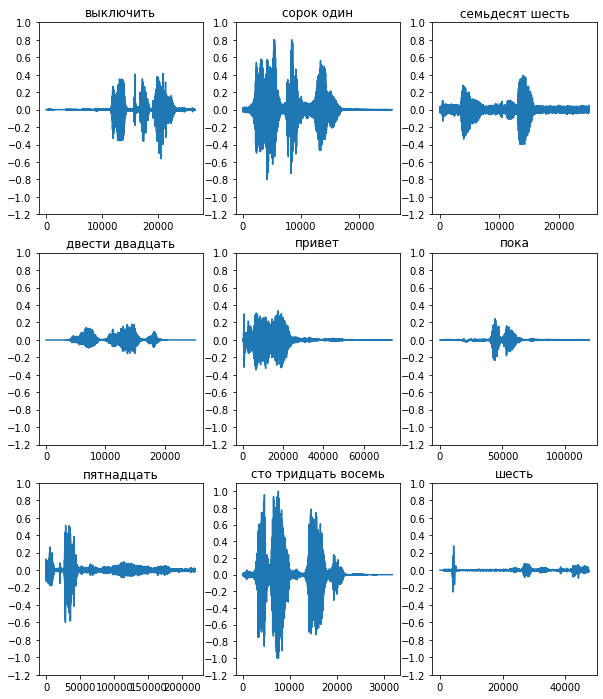

In [42]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy()
    label = numtotext[label]
#     print(type(label),'****', label.numpy())
#     label = name_wav(label)
#     print(type(label), label)
    ax.set_title(label)

plt.show()

Преобразование сигналов в спектрограммы
Сигналы в наборе данных представлены во временной области. Далее вы преобразуете формы сигналов из сигналов во временной области в сигналы в частотно-временной области путем вычисления кратковременного преобразования Фурье (STFT) для преобразования сигналов в виде спектрограмм , которые показывают изменения частоты во времени и могут быть представлены в виде 2D-изображений. Вы будете передавать изображения спектрограммы в свою нейронную сеть для обучения модели.

Преобразование Фурье ( tf.signal.fft ) преобразует сигнал в его составляющие частоты, но теряет всю информацию о времени. Для сравнения, STFT ( tf.signal.stft ) разбивает сигнал на окна времени и выполняет преобразование Фурье в каждом окне, сохраняя некоторую информацию о времени и возвращая двумерный тензор, на котором вы можете выполнять стандартные свертки.

Создайте служебную функцию для преобразования сигналов в спектрограммы:

Сигналы должны быть одинаковой длины, чтобы при преобразовании их в спектрограммы результаты имели одинаковые размеры. Это можно сделать, просто заполнив нулями аудиоклипы, которые короче одной секунды (используя tf.zeros ).
При вызове tf.signal.stft выберите параметры frame_length и frame_step , чтобы сгенерированное «изображение» спектрограммы было почти квадратным. Для получения дополнительной информации о выборе параметров STFT обратитесь к этому видео Coursera об обработке аудиосигнала и STFT.
STFT создает массив комплексных чисел, представляющих величину и фазу. Однако в этом руководстве вы будете использовать только величину, которую можно получить, применив tf.abs к выходным данным tf.signal.stft .

In [43]:
def get_spectrogram(waveform):
    # Zero-padding for an audio waveform with less than 16,000 samples.
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros(
          [16000] - tf.shape(waveform),
          dtype=tf.float32)
    # Cast the waveform tensors' dtype to float32.
    waveform = tf.cast(waveform, dtype=tf.float32)
    # Concatenate the waveform with `zero_padding`, which ensures all audio
    # clips are of the same length.
    equal_length = tf.concat([waveform, zero_padding], 0)
    # Convert the waveform to a spectrogram via a STFT.
    spectrogram = tf.signal.stft(
          equal_length, frame_length=255, frame_step=128)
    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)
      # Add a `channels` dimension, so that the spectrogram can be used
      # as image-like input data with convolution layers (which expect
      # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

In [44]:
for waveform, label in waveform_ds.take(15):
    label = label.numpy()
    label = numtotext[label]
    spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

Label: двести семьдесят один
Waveform shape: (161061,)
Spectrogram shape: (124, 129, 1)
Audio playback


Теперь определите функцию для отображения спектрограммы:

In [45]:
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec)

Постройте форму сигнала примера с течением времени и соответствующую спектрограмму (частоты с течением времени):

двести семьдесят один


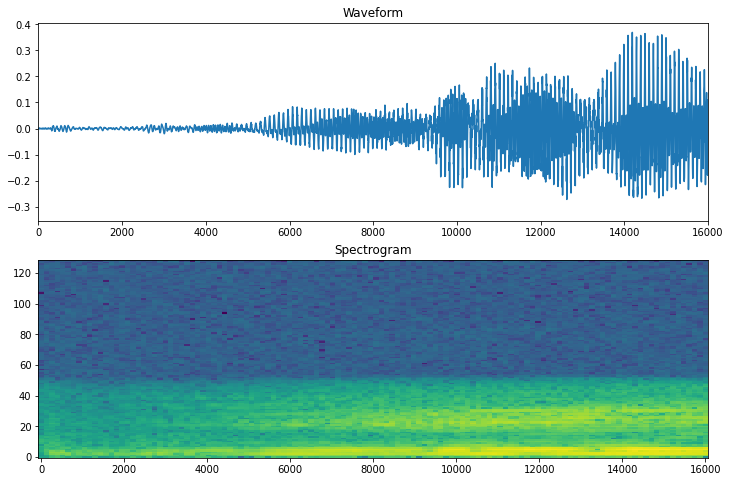

In [46]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
print(label)
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

Теперь определите функцию, которая преобразует набор данных сигнала в спектрограммы и соответствующие им метки в виде целочисленных идентификаторов:

In [47]:
def get_spectrogram_and_label_id(audio, label=None):
    if label != None:
        print(f"label True")
        spectrogram = get_spectrogram(audio)
    #     label_id = tf.argmax(label == commands)
        label_id = label
        print(f"label_id : {label_id} , label : {label}")
        return spectrogram, label_id
    else:
        print(f"label None")
        spectrogram = get_spectrogram(audio)
    #     label_id = tf.argmax(label == commands)
        return spectrogram

Сопоставьте get_spectrogram_and_label_id с элементами набора данных с помощью Dataset.map :

In [48]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

label True
label_id : Tensor("args_1:0", shape=(), dtype=int64) , label : Tensor("args_1:0", shape=(), dtype=int64)


спектрограммы для различных примеров набора данных:

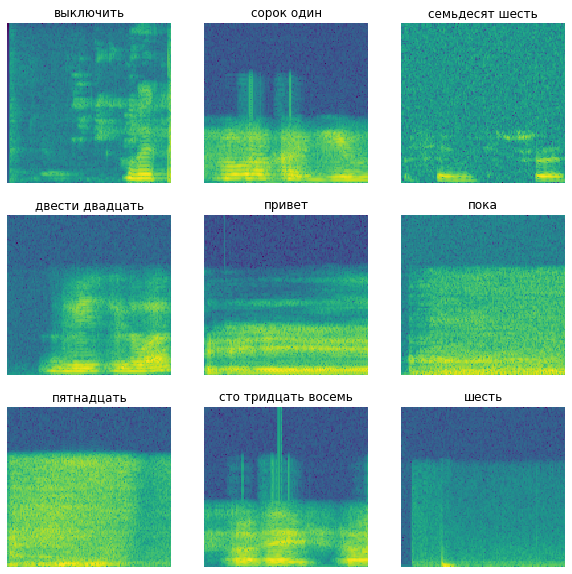

In [49]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(commands[label_id.numpy()])
    ax.axis('off')

plt.show()

# Train model

In [50]:
def test(f, l="q"):
    if l == "q":
        print("q")
    else:
        print(f + l)
test(1, 2)

3


In [51]:
def preprocess_dataset(files, labels="q"):
#     print(labels)
#     if labels == "q":
    try:
        print(labels)
        files_ds = tf.data.Dataset.from_tensor_slices((files, labels))
        output_ds = files_ds.map(
              map_func=get_waveform_and_label,
              num_parallel_calls=AUTOTUNE)
        output_ds = output_ds.map(
              map_func=get_spectrogram_and_label_id,
              num_parallel_calls=AUTOTUNE)
        print("output_ds :", output_ds)
        return output_ds
        
        
#     else:
    except:
        print(1)
        files_ds = tf.data.Dataset.from_tensor_slices((files))
        output_ds = files_ds.map(
              map_func=get_waveform_and_label,
              num_parallel_calls=AUTOTUNE)
        output_ds = output_ds.map(
              map_func=get_spectrogram_and_label_id,
              num_parallel_calls=AUTOTUNE)
        print(len(output_ds))
        return output_ds
        

In [52]:
# x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
# x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)

In [53]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(x_cv, y_cv)
test_ds = preprocess_dataset(x_test, y_test)

18306     1
15717    22
20481    24
23574    30
9185     23
         ..
18302     1
11391    27
15418    23
14249    21
18821     6
Name: text_num, Length: 6755, dtype: int64
label : Tensor("args_1:0", shape=(), dtype=int64)
label True
label_id : Tensor("args_1:0", shape=(), dtype=int64) , label : Tensor("args_1:0", shape=(), dtype=int64)
output_ds : <ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
1191     21
30009    29
29491     4
26983    35
6182     15
         ..
24163    30
9709     32
29452     4
26552    35
17764    26
Name: text_num, Length: 6755, dtype: int64
label : Tensor("args_1:0", shape=(), dtype=int64)
label True
label_id : Tensor("args_1:0", shape=(), dtype=int64) , label : Tensor("args_1:0", shape=(), dtype=int64)
output_ds : <ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


Пакетное обучение и наборы проверки для обучения модели:

In [54]:
batch_size = 16
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [55]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

Для модели вы будете использовать простую сверточную нейронную сеть (CNN), поскольку вы преобразовали аудиофайлы в изображения спектрограмм.

Ваша модель tf.keras.Sequential будет использовать следующие слои предварительной обработки Keras:

tf.keras.layers.Resizing : для уменьшения входных данных, чтобы модель могла обучаться быстрее.
tf.keras.layers.Normalization : нормализовать каждый пиксель изображения на основе его среднего значения и стандартного отклонения.
Для уровня Normalization его метод adapt сначала необходимо вызвать для обучающих данных, чтобы вычислить совокупную статистику (то есть среднее значение и стандартное отклонение).

In [56]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
# ])

In [57]:
# data = spectrogram_ds.map(map_func=lambda spec, label: spec)

In [58]:
# norm_layer = layers.Normalization()
# data

In [59]:
# norm_layer.adapt(data)

In [60]:
# for i in spectrogram_ds:
#     print(i)

In [72]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model3 = models.Sequential([
    
    layers.Input(shape=input_shape),
#     print(input_shape),
    # Downsample the input.
    layers.Resizing(64, 64),
    # Normalize.
    norm_layer,
    layers.Conv2D(64, 5, 2, padding="same", activation='ReLU'),
    layers.Conv2D(128, 3, 2, padding="same", activation='ReLU'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(128, 5, activation='LeakyReLU'),
    layers.Conv2D(256, 3, activation='LeakyReLU'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
#     layers.Conv2D(64, 3, activation='relu'),
#     layers.Conv2D(128, 3, activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='ReLU'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model3.summary()

Input shape: (124, 129, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 64, 64, 1)         0         
                                                                 
 normalization_1 (Normalizat  (None, 64, 64, 1)        3         
 ion)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)       

Настройте модель Keras с помощью оптимизатора Adam и кросс-энтропийной потери:

In [73]:
LEARNING_RATE = 0.001
model3.compile(
    optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [74]:
EPOCHS = 25
history = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
#     callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/25
1267/1267 [==============================] - 44s 34ms/step - loss: 1.3324 - accuracy: 0.6583 - val_loss: 0.7910 - val_accuracy: 0.8016
Epoch 2/25
1267/1267 [==============================] - 40s 31ms/step - loss: 0.7224 - accuracy: 0.8047 - val_loss: 0.5561 - val_accuracy: 0.8454
Epoch 3/25
1267/1267 [==============================] - 39s 31ms/step - loss: 0.5729 - accuracy: 0.8394 - val_loss: 0.6084 - val_accuracy: 0.8369
Epoch 4/25
1267/1267 [==============================] - 39s 31ms/step - loss: 0.5479 - accuracy: 0.8456 - val_loss: 0.4657 - val_accuracy: 0.8779
Epoch 5/25
1267/1267 [==============================] - 39s 30ms/step - loss: 0.4654 - accuracy: 0.8662 - val_loss: 0.4445 - val_accuracy: 0.8813
Epoch 6/25
1267/1267 [==============================] - 39s 30ms/step - loss: 0.4683 - accuracy: 0.8676 - val_loss: 0.3962 - val_accuracy: 0.8936
Epoch 7/25
1267/1267 [==============================] - 40s 32ms/step - loss: 0.4213 - accuracy: 0.8777 - val_loss: 0.3639 -

C увелечением кол-ва эпох было переобучение

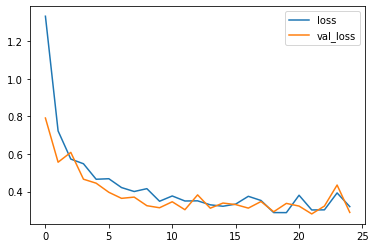

In [81]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# Оцените производительность модели
## Запустите модель на тестовом наборе и проверьте производительность модели:

In [75]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [76]:
test_labels[0]

21

In [77]:
np.argmax(model3.predict(test_audio[[0]]), axis=1)

1/1 [==============================] - 0s 83ms/step


array([21], dtype=int64)

In [78]:
y_pred = np.argmax(model3.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

212/212 [==============================] - 3s 14ms/step
Test set accuracy: 94%


In [73]:
df.head(1)

,name,text,path,text_norm,full_path,full_path_wav,text_num
0,00263e5e-6685-4ad6-9b44-c91af6bd73dd,привет,result_data\,привет,result_data\00263e5e-6685-4ad6-9b44-c91af6bd73dd,result_data\00263e5e-6685-4ad6-9b44-c91af6bd73...,11


# Предсказание Модели

In [82]:
ind_k = df.index[df['text'] == 'килина']

In [85]:

sample_file = df['full_path_wav'][710]
name = df['name'][df['full_path_wav'] == sample_file]
leb = df['text_num'][df['full_path_wav'] == sample_file]

test_audio = []

sample_ds = preprocess_dataset([sample_file])

for audio in sample_ds:
    
    test_audio.append(audio.numpy())

test_audio = np.array(test_audio)
predict = np.argmax(model.predict(test_audio[[0]]), axis=1)

print(f"Predict : {numtotext[predict[0]]}, True_answer : {numtotext[list(set(leb.values))[0]]}")

q
1
label None
1
1/1 [==============================] - 0s 28ms/step
Predict : выключить, True_answer : выключить


In [86]:
for i in ind_k:
    sample_file = df['full_path_wav'][i]
    name = df['name'][df['full_path_wav'] == sample_file]
    leb = df['text_num'][df['full_path_wav'] == sample_file]

    test_audio = []

    sample_ds = preprocess_dataset([sample_file])

    for audio in sample_ds:
    
        test_audio.append(audio.numpy())

    test_audio = np.array(test_audio)
    predict = np.argmax(model.predict(test_audio[[0]]), axis=1)

    print(f"Predict : {numtotext[predict[0]]}, True_answer : {numtotext[list(set(leb.values))[0]]}")

q
1
label None
1
1/1 [==============================] - 0s 29ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 33ms/step
Predict : детский, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 45ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 38ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 32ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 32ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 46ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 48ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 26ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [=====

1/1 [==============================] - 0s 17ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : детский, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 20ms/step
Predict : два, True_answer : килина
q
1
label None
1
1/1 [=========================

1/1 [==============================] - 0s 22ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : два, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : детский, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : детский, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 20ms/step
Predict : два, True_answer : килина
q
1
label None
1
1/1 [===========================

1/1 [==============================] - 0s 17ms/step
Predict : два, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 20ms/step
Predict : детский, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : два, True_answer : килина
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : килина
q
1
label None
1
1/1 [============================

In [77]:
for i in range(10, 100, 3):
    sample_file = df['full_path_wav'][i]
    name = df['name'][df['full_path_wav'] == sample_file]
    leb = df['text_num'][df['full_path_wav'] == sample_file]

    test_audio = []

    sample_ds = preprocess_dataset([sample_file])

    for audio in sample_ds:
    
        test_audio.append(audio.numpy())

    test_audio = np.array(test_audio)
    predict = np.argmax(model.predict(test_audio[[0]]), axis=1)

    print(f"Predict : {numtotext[predict[0]]}, True_answer : {numtotext[list(set(leb.values))[0]]}")

q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : килина, True_answer : один
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : два
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : килина, True_answer : один
q
1
label None
1
1/1 [==============================] - 0s 21ms/step
Predict : двадцать, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 19ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : килина, True_answer : два
q
1
label None
1
1/1 [==============

# _____________________________________________________________

# Save model

In [79]:
model2.save('saved_model/voice_recognition_model_4')

INFO:tensorflow:Assets written to: saved_model/voice_recognition_model_4\assets


INFO:tensorflow:Assets written to: saved_model/voice_recognition_model_4\assets


# load model

In [3]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model/voice_recognition_model_4')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 64, 64, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 64, 64, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 128)         0

In [80]:
ind_n = [i for i in range(10)]

In [81]:
for i in ind_n:
    sample_file = df['full_path_wav'][i]
    name = df['name'][df['full_path_wav'] == sample_file]
    leb = df['text_num'][df['full_path_wav'] == sample_file]

    test_audio = []

    sample_ds = preprocess_dataset([sample_file])

    for audio in sample_ds:
    
        test_audio.append(audio.numpy())

    test_audio = np.array(test_audio)
    predict = np.argmax(new_model.predict(test_audio[[0]]), axis=1)

    print(f"Predict : {numtotext[predict[0]]}, True_answer : {numtotext[list(set(leb.values))[0]]}")

q
1
label None
1
1/1 [==============================] - 0s 60ms/step
Predict : точка, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : семьдесят шесть, True_answer : семьдесят шесть
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 18ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : привет, True_answer : привет
q
1
label None
1
1/1 [==============================] - 0s 16ms/step
Predict : килина, True_answer : один
q
1
label None
1
1/1 [==============================] - 0s 17ms/step
Predict : сорок один, True_answer : сорок один
q
1
label None
1
1/1 [==============================] - 0s 33ms/step
Predict : привет, True_answer : привет
q
1
l

# to tf lite

In [80]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/voice_recognition_model_4') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('lite_model\\voice_recognition_model_lite_4.tflite', 'wb') as f:
    f.write(tflite_model)